# Logistic Regression for Gene Expression Data

In this exercise, we use logistic regression to predict biological characteristics ("phenotypes") from gene expression data. In doing this exercise, you will learn to:
* Handle missing data
* Perform multi-class logistic classification
* Create a confusion matrix (a table of the fraction of samples of class i being confused with class j)
* Use L1-regularization for improved estimation in the case of sparse weights 

## Background

Genes are the basic unit in the DNA and encode blueprints for proteins.  When proteins are synthesized from a gene, the gene is said to "express".  Micro-arrays are devices that measure the expression levels of large numbers of genes in parallel.  By finding correlations between expression levels and phenotypes, scientists can identify possible genetic markers for biological characteristics.

The data in this lab comes from:

https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

In this data, mice were characterized by three properties:
* Whether they had down's syndrome (trisomy) or not
* Whether they were stimulated to learn or not
* Whether they had a drug memantine or a saline control solution.

With these three choices, there are 8 possible classes for each mouse.  For each mouse, the expression levels were measured across 77 genes.  We will see if the characteristics can be predicted from the gene expression levels.  This classification could reveal which genes are potentially involved in Down's syndrome and if drugs and learning have any noticeable effects.


## Load the Data

We begin by loading the standard modules.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

Use the `pd.read_excel` command to read the data from 

https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls

into a dataframe `df`.  Use the `index_col` option to specify that column 0 is the index.  Use the `df.head()` to print the first few rows.

In [3]:
# TODO
# df = pd.read_excel(...)
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls", index_col = 0)
df.head()


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


This data has missing values.  The site:

http://pandas.pydata.org/pandas-docs/stable/missing_data.html

has an excellent summary of methods to deal with missing values.  Following the techniques there, create a new data frame `df1` where the missing values in each column are filled with the mean values from the non-missing values.

In [120]:
df.shape
df.dtypes
#df.columns
#np.nanmean(df[df.columns[0]])
#df[df.columns[0]].dtypes == 'float64'
#df1 = np.zeros(shape=df.shape)
#df1 = pd.dataframe(df1, columns = df.columns)
#df[df.columns[80]].dtypes == 'object'

DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

In [5]:
# TODO
# df1 = ...
#df.shape #(1080, 81)
#df.dtypes
df1 = df
col = df.shape[1] - 1

#clean null data
for ind in range(col):
    if df[df.columns[ind]].dtypes == 'float64':
        mean = np.nanmean(df[df.columns[ind]])
        df1[df1.columns[ind]] = np.where(df[df.columns[ind]].isnull(), mean, df[df.columns[ind]])
    elif df[df.columns[ind]].dtypes == 'object':
        df1[df1.columns[ind]] = df[df.columns[ind]]
df1.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [6]:
#check if there are any null cells exist
print(df1.isnull().sum())

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
                  ..
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N        

## Binary Classification for Down's Syndrome

We will first predict the binary class label in `df1['Genotype']` which indicates if the mouse has Down's syndrome or not.  Get the string values in `df1['Genotype'].values` and convert this to a numeric vector `y` with 0 or 1.  You may wish to use the `np.unique` command with the `return_inverse=True` option.

In [7]:
# TODO
# vals, y = ...
vals, y = np.unique(df1['Genotype'].values, return_inverse = True)

For the predictors, we will use all but the last four columns of the dataframes.  First, get the names of these genes with the command:

    xnames = df1.columns[:-4]
    
Then, get the data values corresponding to these columns and store the values in a matrix `X`.  This matrix will have the expression levels for the 77 genes.  Standardize the data matrix and call the standardized matrix `Xs`. 

In [8]:
# Get names of the genes
xnames=df1.columns[:-4]

# TODO
# X = data matrix corresponding to xnames
# Xs = scaled data matrix X
X = df1[xnames]
Xs = preprocessing.scale(X)

Create a `LogisticRegression` object `logreg` and `fit` the training data.  You can leave the arguments blank or specify `C=1`; those are equivalent.  `C` is an inverse L2 regularization constant.  Changing it changes the results.

In [9]:
# TODO
# logreg = ...
# logreg.fit(...)
logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Measure the accuracy of the classifer.  That is, use the `logreg.predict` function to predict labels `yhat` and measure the fraction of time that the predictions match the true labels.  Below, we will properly measure the accuracy on cross-validation data.

In [10]:
# TODO
# yhat = ...
# acc = ...
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print('fraction of time that the prediction match the true labels = %f' % acc)

fraction of time that the prediction match the true labels = 0.985185


## Interpreting the weight vector

Create a stem plot of the coefficients, `W` in the logistic regression model.  You can get the coefficients from `logreg.coef_`, but you will need to reshape this to a 1D array.  (Unlike in R or matlab, in Python, an `n`-length row or column vector is considered to be of shape or size `n`.  It is a 1-dimensional object, not an `nx1` or `1xn` object.  So a 2D array consisting of only 1 row or 1 column is not the same thing as being a 1D array.  You can use the `ravel` method where if `u` is `1xn`, `u.ravel()` would return a 1d version of `u`.)

<Container object of 3 artists>

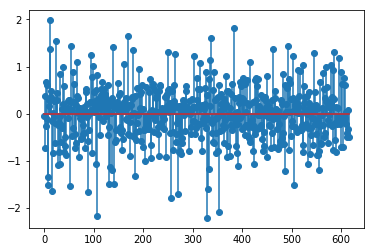

In [60]:
# TODO
# W = logref.coef_
# W = convert to 1D
# Plot W
W = logreg.coef_
W = W.ravel()
plt.stem(W)

You should see that `W[i]` is very large for a few components `i`.  These are the genes that are likely to be most involved in Down's Syndrome.  Although, we do not discuss it in this class, there are ways to force the logistic regression to return a sparse vector `W`.  

Find the names of the genes for two components `i` where the magnitude of `W[i]` is largest. You could use the command np.argsort with the appropriate arguments.

In [12]:
# TODO
genes = xnames[np.argsort(-W)]
print('The names of the genes with the largest W are %s and %s' % (genes[0], genes[1]))

The names of the genes with the largest W are ITSN1_N and APP_N


## Cross Validation

The above meaured the accuracy on the training data.  It is better to measure the accuracy on the test data.  Perform 10-fold cross validation and measure the accuracy.  Note, that in performing the cross-validation, you will want to randomly permute the test and training sets using the `shuffle` option.  In this data set, all the samples from each class are bunched together, so shuffling is essential.  Print the mean accuracy across all the folds.  (If you already did the homework and found precision, f1-score and recall, that is fine.  You do not have to redo this slightly easier version. If you want to the latter, you will need to import precision_recall_fscore_support from sklearn.metrics.)

In [23]:
# TODO A possible beginning here
from sklearn.model_selection import KFold

# This line is not necesssary if you are just finding accuracy
from sklearn.metrics import precision_recall_fscore_support

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
acc=[]
for isplit, Ind in enumerate(kf.split(Xs)):
    print("fold = %d" % isplit)
    Itr, Its = Ind
    Xtr = Xs[Itr, :]
    ytr = y[Itr]
    Xts = Xs[Its, :]
    yts = y[Its]
    
    logreg = linear_model.LogisticRegression()
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    acc.append((np.mean(yhat == yts)))

accuracy = np.mean(acc)
print('mean of accuracy across all the folds = %f' %accuracy)

fold = 0
fold = 1
fold = 2
fold = 3
fold = 4
fold = 5
fold = 6
fold = 7
fold = 8
fold = 9
mean of accuracy across all the folds = 0.972222


## Multi-Class Classification

Now use the response variable in `df1['class']`.  This data has 8 possible classes from the three binary properties of mice described above.  Use the `np.unique` funtion as before to convert this to a vector `y` with values 0 to 7. You can see them by starting below.

In [30]:
ystr = df1['class'].values
# TODO
# vals, y = 
#np.unique(df1['class'])

vals, y = np.unique(df1['class'].values, return_inverse = True)

Fit a multi-class logistic model by creating a `LogisticRegression` object, `logreg` and then calling the `logreg.fit` method.  Again, use C=1 or leave the arguments blank.  

In [42]:
# TODO
logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Measure the accuracy on the training data.

In [49]:
# TODO
yhat = logreg.predict(Xs)
acc = np.mean(y == yhat)
print('accuracy = %f' % acc)

accuracy = 0.997222


Now perform 10-fold cross validation, and measure the confusion matrix `C` on the test data in each fold. You can use the `confusion_matrix` method in the `sklearn` package.  Add the confusion matrix counts across all folds and then normalize the rows of the confusion matrix so that they sum to one.  Thus, each element `C[i,j]` will represent the fraction of samples where `yhat==j` given `ytrue==i`.  Print the confusion matrix.  You can use the command

    print(np.array_str(C, precision=4, suppress_small=True))
    
to create a nicely formatted print.  Also print the overall mean and SE of the test accuracy across the folds.

In [50]:
# TODO  POssible beginning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

logreg = linear_model.LogisticRegression()

# Initialize the confusion matrix counts
ny = np.max(y)
C = np.zeros((ny+1,ny+1))

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
acc=[]
ny = np.max(y)
C = np.zeros((ny+1,ny+1))

for isplit, Ind in enumerate(kf.split(Xs)):
    print("fold = %d" % isplit)
    Itr, Its = Ind
    Xtr = Xs[Itr, :]
    ytr = y[Itr]
    Xts = Xs[Its, :]
    yts = y[Its]
    
    logreg = linear_model.LogisticRegression()
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    #Add the confusion matrix counts across all folds
    
    C = C + confusion_matrix(yts, yhat)
    acc.append((np.mean(yhat == yts)))
    



#normalize the rows of the confusion matrix so that they sum to one
Cs = preprocessing.scale(C)
print(np.array_str(Cs, precision=4, suppress_small=True))

#print the overall mean and SE of the test accuracy across the folds
accuracy = np.mean(acc)
sd = np.std(acc)
print("overall mean and SE of the test accuracy across the folds are %f and %f, respectively" % (accuracy, sd))

fold = 0
fold = 1
fold = 2
fold = 3
fold = 4
fold = 5
fold = 6
fold = 7
fold = 8
fold = 9
[[ 2.6456 -0.3415 -0.3605 -0.3844 -0.3256 -0.3821 -0.378  -0.378 ]
 [-0.3659  2.6454 -0.3809 -0.3844 -0.3485 -0.3532 -0.378  -0.378 ]
 [-0.387  -0.3878  2.6457 -0.3618 -0.3942 -0.3821 -0.378  -0.378 ]
 [-0.3659 -0.3878 -0.3809  2.6456 -0.3942 -0.3821 -0.378  -0.378 ]
 [-0.3659 -0.3647 -0.3809 -0.3844  2.6449 -0.3821 -0.378  -0.378 ]
 [-0.387  -0.3878 -0.3809 -0.3844 -0.3942  2.6456 -0.378  -0.378 ]
 [-0.387  -0.3878 -0.3809 -0.3618 -0.3942 -0.3821  2.6458 -0.378 ]
 [-0.387  -0.3878 -0.3809 -0.3844 -0.3942 -0.3821 -0.378   2.6458]]
overall mean and SE of the test accuracy across the folds are 0.986111 and 0.006211, respectively


Re-run the logistic regression on the entire training data and get the weight coefficients.  This should be a 8 x 77 matrix.  Create a stem plot of the first row of this matrix to see the coefficients on each of the genes for predicting the first class.

<Container object of 3 artists>

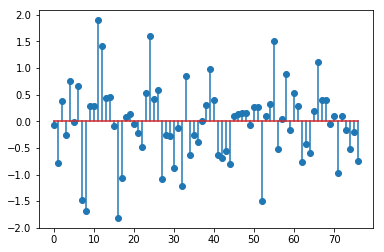

In [78]:
# TODO

logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)
W = logreg.coef_

#first row of the weight coefficients matrix
W1 = W[0,:]
W1 = W1.ravel()
plt.stem(W1)


## L1-Regularization


In most genetic problems, only a limited number of the tested genes are likely influence any particular attribute.  Hence, we would expect that the weight coefficients in the logistic regression model should be sparse.  That is, they should be zero on any gene that plays no role in the particular attribute of interest.  Genetic analysis commonly imposes sparsity by adding an l1-penalty term.  Read the `sklearn` [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the `LogisticRegression` class to see how to set the l1-penalty and the inverse regularization strength, `C`.

Use K-fold cross validation to select an appropriate inverse regularization strength.  
* Use 10-fold cross validation 
* You should select around 20 values of `C`.  It is up to you find a good range.
* Make appropriate plots and print out to display your results
* Use the one  SE rule to find the optimal `C`.
* How does the accuracy compare to the accuracy achieved without regularization.

In [82]:
# TODO:  Perform the cross validation to compute the accuracy per fold and per C
c = 20
c_test = np.logspace(-1, 1, 20)
acc = np.zeros((c, nfold))

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

for it, c in enumerate(c_test):
    for isplit, Ind in enumerate(kf.split(Xs)):
        Itr, Its = Ind
        Xtr = Xs[Itr, :]
        ytr = y[Itr]
        Xts = Xs[Its, :]
        yts = y[Its]
        
        logreg = linear_model.LogisticRegression(penalty = 'l1', C=c)
        logreg.fit(Xtr, ytr)
        yhat = logreg.predict(Xts)
        acc[it, isplit] = np.mean(yhat == yts)
        
acc #col = kfold, row = c



array([[ 0.87962963,  0.92592593,  0.96296296,  0.96296296,  0.9537037 ,
         0.9537037 ,  0.96296296,  0.96296296,  0.96296296,  0.92592593],
       [ 0.93518519,  0.97222222,  0.99074074,  0.9537037 ,  0.96296296,
         0.97222222,  0.93518519,  0.98148148,  0.97222222,  0.90740741],
       [ 0.99074074,  0.96296296,  0.97222222,  0.98148148,  0.98148148,
         0.9537037 ,  0.93518519,  0.97222222,  0.9537037 ,  0.97222222],
       [ 0.97222222,  0.9537037 ,  0.99074074,  0.96296296,  0.94444444,
         0.97222222,  0.98148148,  0.96296296,  0.97222222,  0.97222222],
       [ 0.9537037 ,  0.98148148,  0.99074074,  0.97222222,  0.97222222,
         0.97222222,  0.9537037 ,  1.        ,  0.96296296,  0.98148148],
       [ 0.96296296,  0.97222222,  0.99074074,  1.        ,  1.        ,
         0.98148148,  0.98148148,  0.99074074,  0.98148148,  0.99074074],
       [ 0.99074074,  0.99074074,  1.        ,  0.96296296,  1.        ,
         0.97222222,  0.99074074,  0.99074074

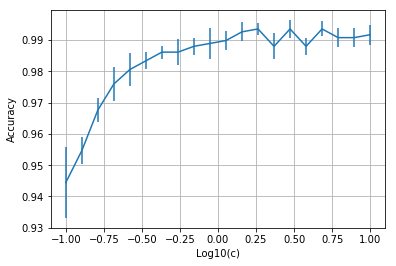

In [81]:
# TODO:  Compute the mean and one SE accuracy and plot with errorbars.
acc_mean = np.mean(acc, axis = 1)
acc_se = np.std(acc, axis = 1)/np.sqrt(nfold - 1)

#plot
plt.errorbar(np.log10(c_test), acc_mean, yerr=acc_se)
plt.xlabel('Log10(c)')
plt.ylabel('Accuracy')
plt.grid()


In [101]:
# TODO:  Compute the optimal C with the one SE rule
imax = np.argmax(acc_mean)
c_usu = c_test[imax]
acc_usu = acc_mean[imax]

print('Max accuracy = %f' %acc_usu)
print('Optimal C with usual rule = %f' %c_usu)

acc_tgt = acc_usu - acc_se[imax]
iopt = np.where(acc_mean >= acc_tgt)[0][0]
acc_opt = acc_mean[iopt]
c_opt = c_test[iopt]
print('Max accuracy with the one SE rule = %f' % acc_opt)
print('Optimal C with the one SE rule = %f' % c_opt)

Max accuracy = 0.993519
Optimal C with usual rule = 1.832981
Max accuracy with the one SE rule = 0.992593
Optimal C with the one SE rule = 1.438450


For the optimal `C`, fit the model on the entire training data with l1 regularization. Find the resulting weight matrix, `W_l1`.  Plot the first row of this weight matrix and compare it to the first row of the weight matrix without the regularization.  You should see that, with l1-regularization, the weight matrix is much more sparse and hence the roles of particular genes are more clearly visible.

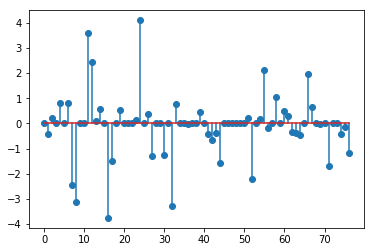

In [118]:
# TODO

#optimal c = c_opt
#with l1 regularization
logreg = linear_model.LogisticRegression(penalty = 'l1', C=c_opt)
logreg.fit(Xs, y)
W = logreg.coef_

#first row of the weight coefficients matrix
W1 = W[0,:]
W1 = W1.ravel()
plt.stem(W1)
plt.show()

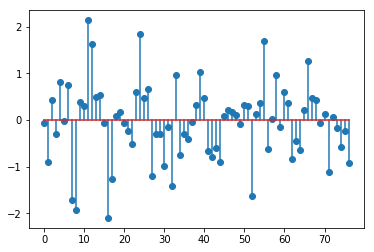

In [119]:
#without l1 regularization
logreg = linear_model.LogisticRegression(C=c_opt)
logreg.fit(Xs, y)
W = logreg.coef_

#first row of the weight coefficients matrix
W1 = W[0,:]
W1 = W1.ravel()
plt.stem(W1)
plt.show()